# 모델 평가와 성능 향상

## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]
from preamble import *

## 교차 검증

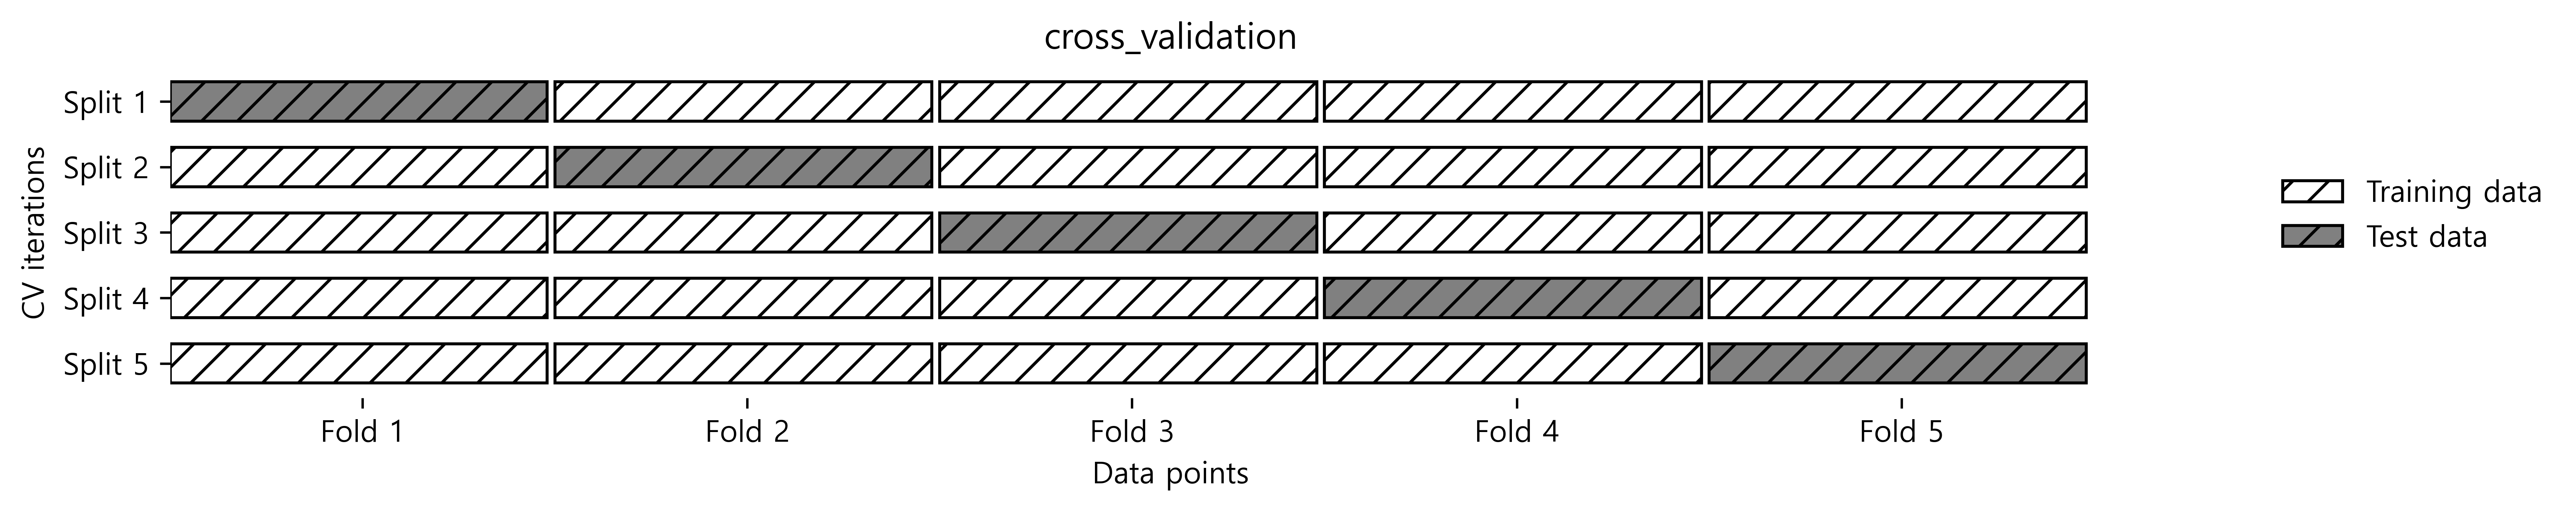

In [3]:
mglearn.plots.plot_cross_validation()

### KF-Q1. 교차검증
- [ ] iris 데이터를 사용해서 교차검증 결과를 출력해보세요.
- [ ] iris 데이터는 LogisticRegression를 활용하세요.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)
scores

array([0.967, 1.   , 0.933, 0.967, 1.   ])

- [ ] 교차 검증을 10회 반복하세요.

In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 10)
scores

array([1.   , 0.933, 1.   , 1.   , 0.933, 0.933, 0.933, 1.   , 1.   ,
       1.   ])

- [ ] 교차 검증에 사용된 지표를 출력하세요.

In [8]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, 
                     iris.data, 
                     iris.target, 
                     return_train_score=True)
res

{'fit_time': array([0.009, 0.012, 0.016, 0.01 , 0.01 ]),
 'score_time': array([0.001, 0.   , 0.   , 0.   , 0.001]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [11]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,8.45e-03,5.08e-04,0.97,0.97
1,1.30e-02,5.56e-04,1.00,0.97
2,7.23e-03,4.97e-04,0.93,0.98
3,9.39e-03,4.81e-04,0.97,0.98
4,7.45e-03,3.18e-04,1.00,0.97


평균 시간과 점수:
 fit_time       9.10e-03
score_time     4.72e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


### KF-Q2 계층별 k-겹 교차 검증

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


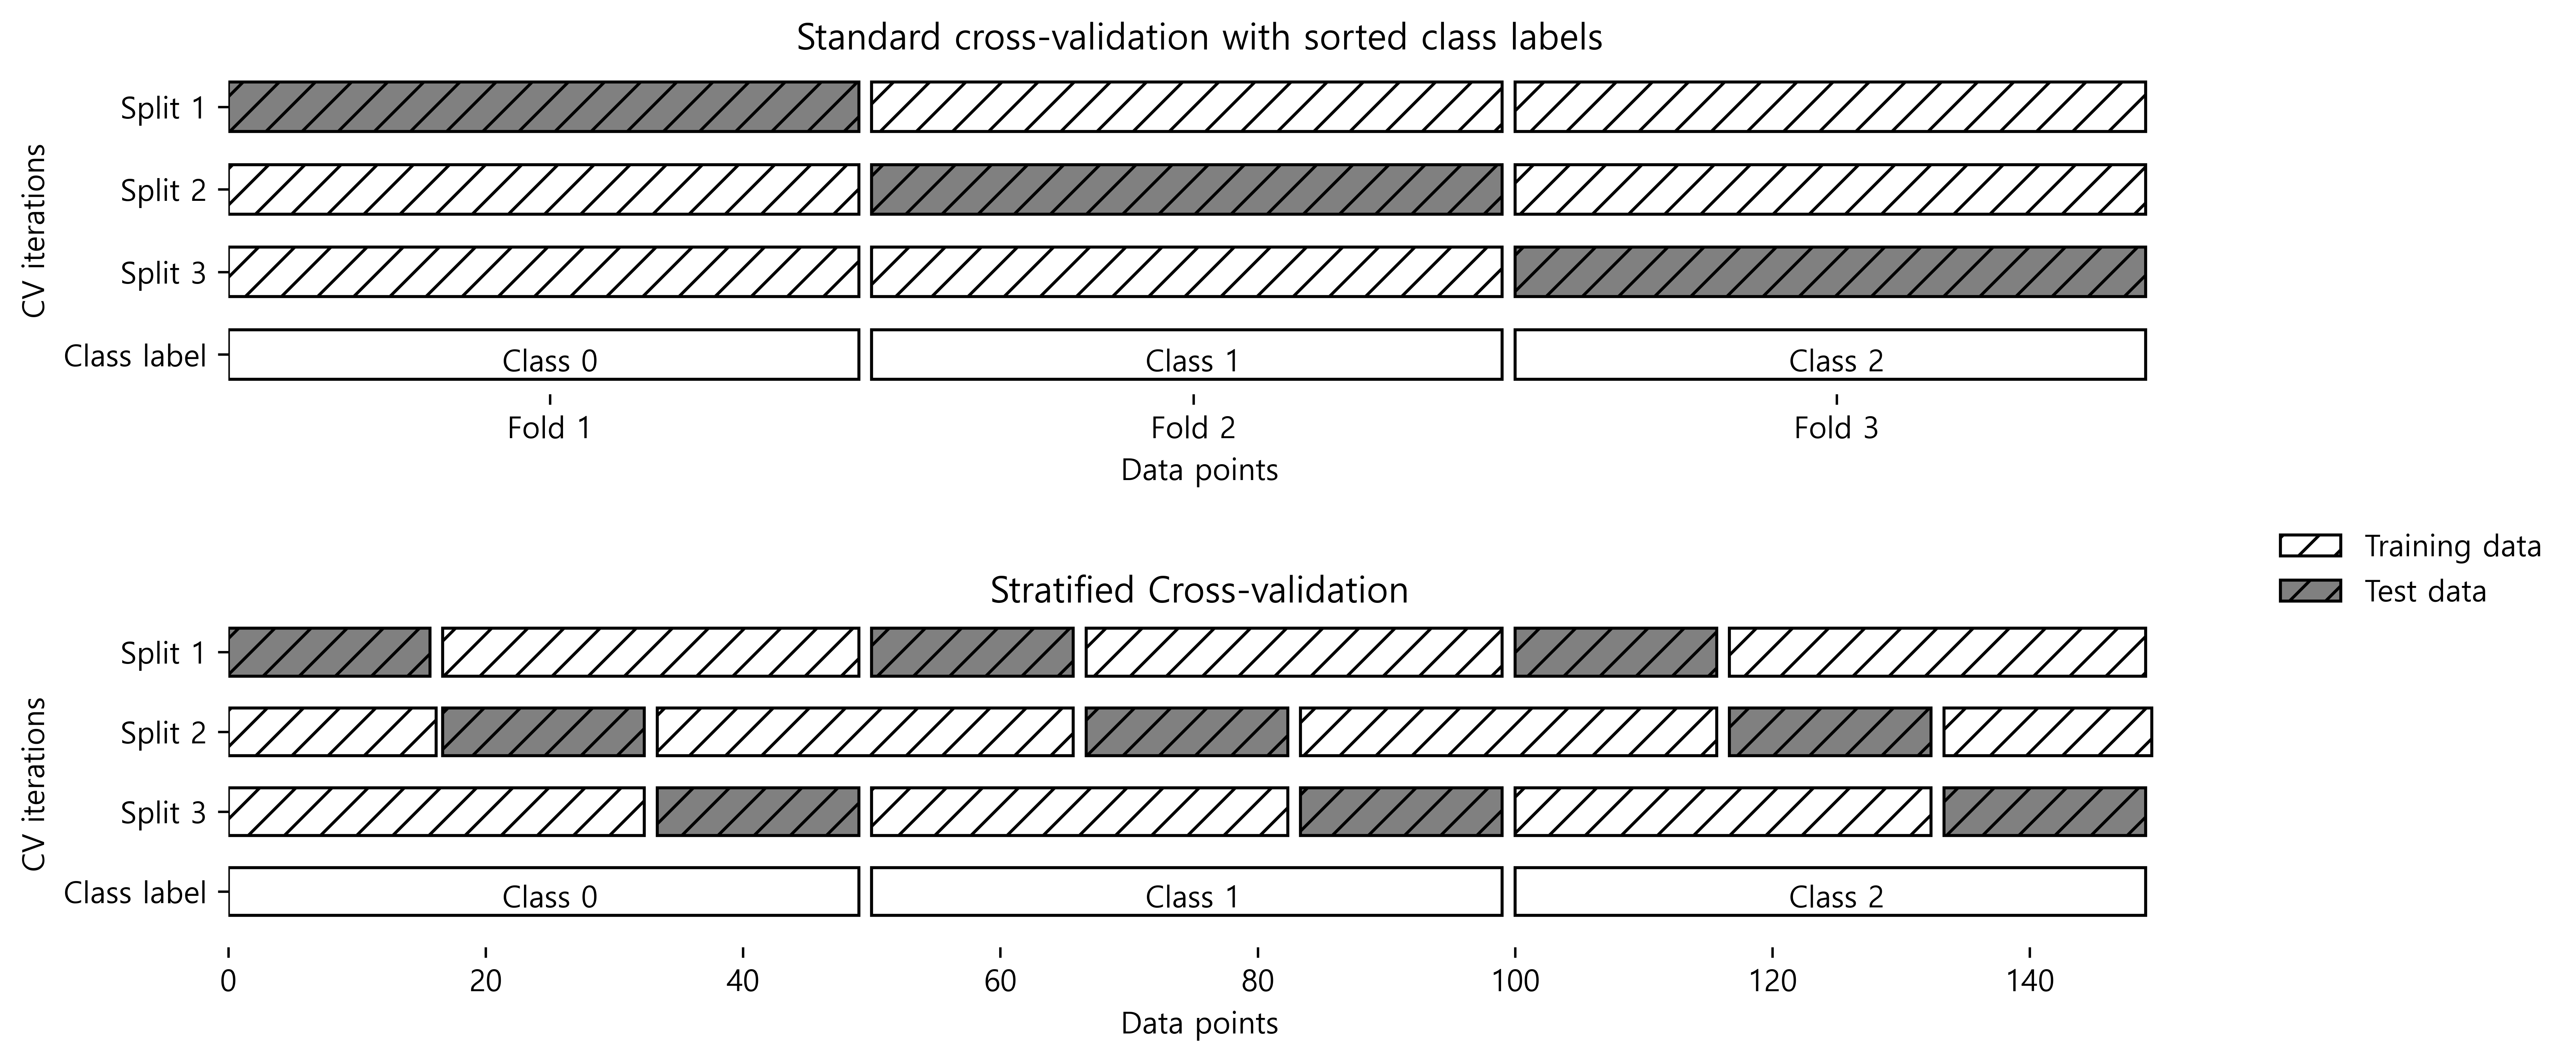

In [12]:
mglearn.plots.plot_stratified_cross_validation()

- 교차 검증 상세 옵션

In [19]:
from sklearn.model_selection import KFold # cross_val_score, cross_validate와 세트로 사용
kfold = KFold(n_splits=5, shuffle=True) # 잘 정리된 데이터를 사용할 떄 shuffle 사용
scores = cross_val_score(logreg, iris.data, iris.target, cv = kfold)
scores

array([0.967, 1.   , 1.   , 0.967, 0.833])

교차 검증 점수:
 [0. 0. 0.]


교차 검증 점수:
 [0.98 0.96 0.96]
